# **Tutorial de Criação de App: Chat**
---

Pré-requisitos da aula

- Funções
- Import
- Orientação a Objetos
- Interface Gráfica
- Introdução ao Flet
- Meu primeiro Flet App
- Eventos
- Light e Dark Mode

---

Finalmente chegamos à fase em que iremos desenvolver nossos apps completos para você poder publicar à vontade e mostrar para os amigos com um aplicativo para chamar de seu. Nosso primeiro app do curso será um **Chat Online**, para você mesmo poder fazer concorrência ao WhatsApp e ao Telegram...rsrs.

Exageros à parte, vamos começar:

### Começando a criar o app

1. Nosso app será construído com Flet. Portanto vamos começar criando o nosso projeto. Capriche no nome. Para o projeto desse tutorial, vamos simplesmente chamá-lo de **chat**. Não se esqueça do procedimento padrão de criar um ambiente virtual `.venv`, instalar o flet com `pip install flet` e criar um projeto flet com `flet create .` na pasta do seu projeto.
2. Confira o código-fonte padrão do projeto dentro do arquivo `main.py`:

In [ ]:
import flet as ft


def main(page: ft.Page):
    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

3. Acrescente as propriedades que desejar antes de começarmos a desenvolver, de fato, o nosso programa:

In [ ]:
import flet as ft


def main(page: ft.Page):
    # propriedades da página
    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

### AppBar

4. Vamos começar com o **AppBar**. O AppBar é uma barra superior da nossa aplicação que será inserida antes de `page.add()`:

In [ ]:
import flet as ft


def main(page: ft.Page):
    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar()

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

5. Isso já é o suficiente para gerar um AppBar, embora sem conteúdo. Veja:

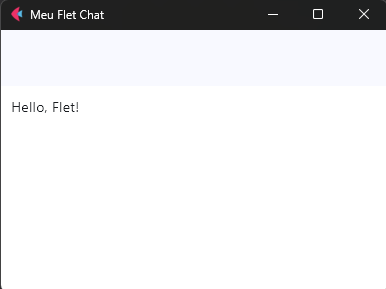

6. Vamos começar colocando um título para o nosso AppBar:

In [ ]:
import flet as ft


def main(page: ft.Page):
    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16))

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

7. Aproveitaremos que criamos na aula passada um algoritmo para alternar os temas Light e Dark. Vamos implementar esse código dentro do AppBar, com uma alteração: iremos trocar o texto "**Light theme**" e "**Dark theme**" do app da aula anterior por ícones representando os temas. Para isso, iremos criar uma variável representando o ícone do tema padrão da aplicação (que é o tema claro).
8. Depois, iremos programar uma condicional para essa variável para que o ícone mude quando o *switch button* for acionado.
9. Enfim, chamaremos essa variável desta vez dentro do **AppBar** ao invés do SafeBar, acrescentando ao final de `ft.AppBar()` o parâmetro `actions=[tema, interruptor]`, onde `tema` representa o ícone do tema, e `interruptor` representa o *switch button*:

In [ ]:
import flet as ft


def main(page: ft.Page):
    # função do tema
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        # altera o ícone do tema
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # ícone e botão do tema
    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16), actions=[tema, interruptor])

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))


ft.app(main)

10. Vamos ver como o nosso app está ficando. Para fins práticos, será mostrado abaixo apenas a tela do app no Desktop, mas procure executar também o seu app nas versões Web e Mobile:

#### Light Mode:

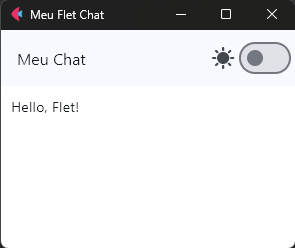

#### Dark Mode:

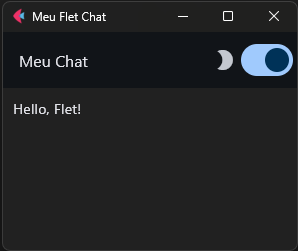

11. Legal! Agora, vamos começar a construção do app em si.

### Adicionando controles de página e manipulando eventos

12. Para começar, queremos poder receber a entrada do usuário (mensagem de bate-papo) e mostrar o histórico de mensagens na tela. O layout para esta etapa poderia ser assim:

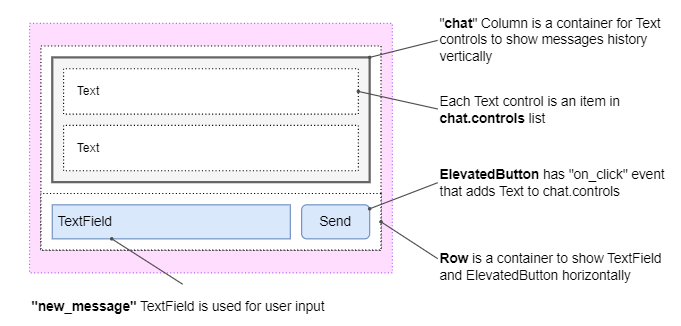
<br />
Imagem retirada do site da documentação do Flet.

13. Para implementar este layout, usaremos estes controles Flet:

- `Column`: um container para exibir mensagens de bate-papo (controles de texto) verticalmente.
- `Text`: mensagem de bate-papo exibida na coluna de bate-papo.
- `TextField`: controle de entrada usado para receber novas entradas de mensagens do usuário.
- `ElevatedButton`: Botão "Enviar" que adicionará uma nova mensagem à coluna de chat.
- `Row`: um container para exibir TextField e ElevatedButton horizontalmente.

14. Vamos instanciar dois objetos: um `ft.Column()` que representará as mensagens enviadas ao chat, e um `ft.TextField()`, que representará um campo de entrada de texto da mensagem a ser enviada ao chat.
15. Em seguida, vamos criar uma função que será executada quando o usuário quiser enviar a mensagem digitada ao chat.
16. Por fim, vamos trocar o conteúdo atual de `page.add()` pelos elementos que acabamos de criar, sendo que a caixa de texto e o botão entrarão dentro de um controle de layout chamado `ft.Row()`. O código deverá ficar parecido com o abaixo:


In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    # função de enviar mensagem para o chat
    def enviar(e):
        chat.controls.append(ft.Text(nova_mensagem.value))
        nova_mensagem.value = ""
        page.update()

    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    # elementos do chat
    chat = ft.Column()
    nova_mensagem = ft.TextField(label="Digite sua mensagem", on_submit=enviar)

    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16), actions=[tema, interruptor])

    page.add(
        chat, ft.Row(controls=[nova_mensagem, ft.ElevatedButton("Enviar", on_click=enviar)])
    )

ft.app(main)

17. Ao executar o app com `flet run main.py`, o aplciativo irá se parecer com a imagem abaixo:

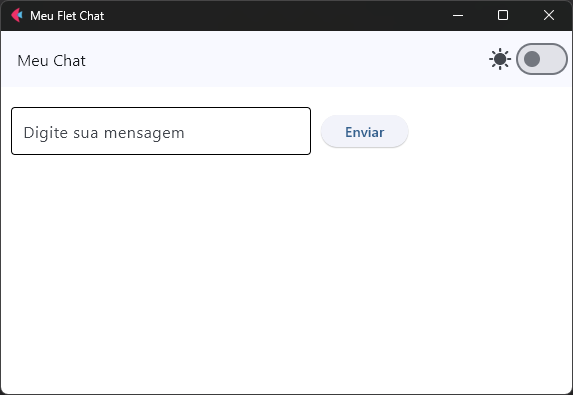

18. Repare como o conteúdo da página muda conforme você envia as mensagens. Você pode enviar as mensagens clicando no botão **Enviar** ou apertando a teclar **Enter**:

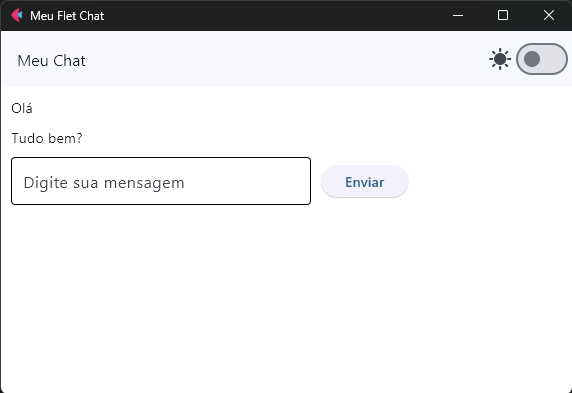

19. Veja como a tela fica legal no modo escuro:

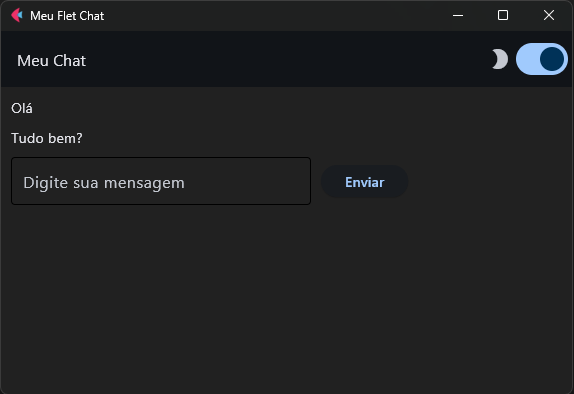

20. Quando o usuário clica no botão "Enviar", ele aciona o evento on_click que chama o método `enviar`. A função adiciona um novo controle de texto à lista de controles de coluna e limpa o valor de `nova_mensagem` `TextField`.

### Transmitindo mensagens de bate-papo

21. Na etapa anterior, criamos um aplicativo simples que recebe informações do usuário e exibe mensagens de bate-papo na tela. Se você abrir este aplicativo em duas guias do navegador da web, ele criará duas sessões de aplicativo. Cada sessão terá sua própria lista de mensagens. Portanto, vamos executar no terminal o comando `flet run --web main.py`:

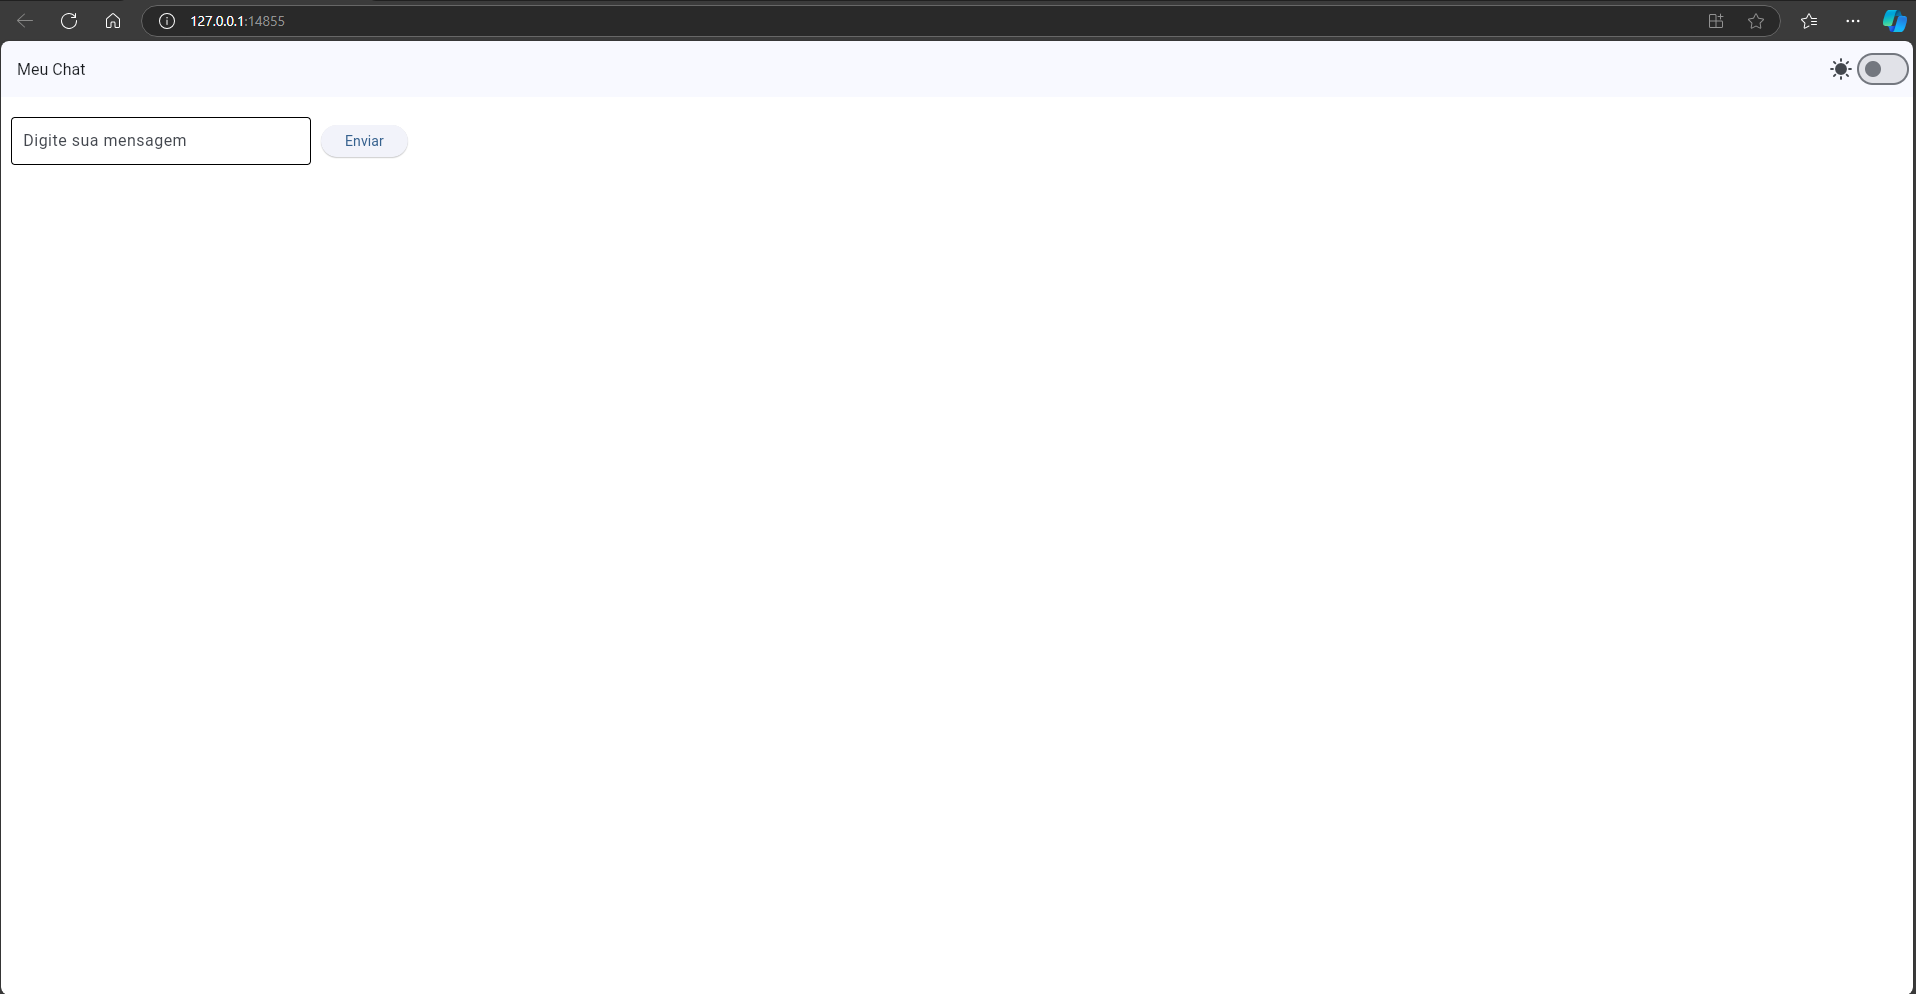

22. Depois de aberto, copie o URL e cole-o em uma nova aba:

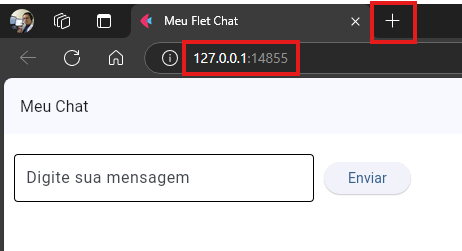

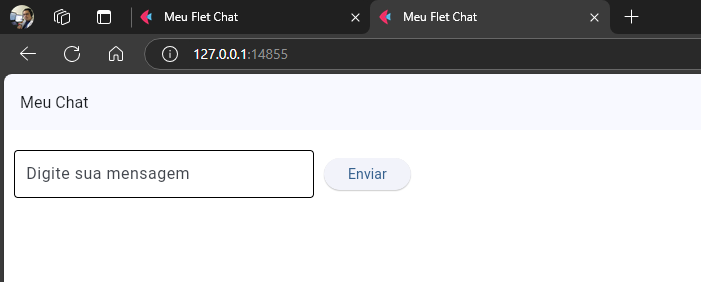

23. Para facilitar a visualização, separe as guias em duas janelas lado a lado. Deixe uma em modo escuro para poder diferenciar as duas:

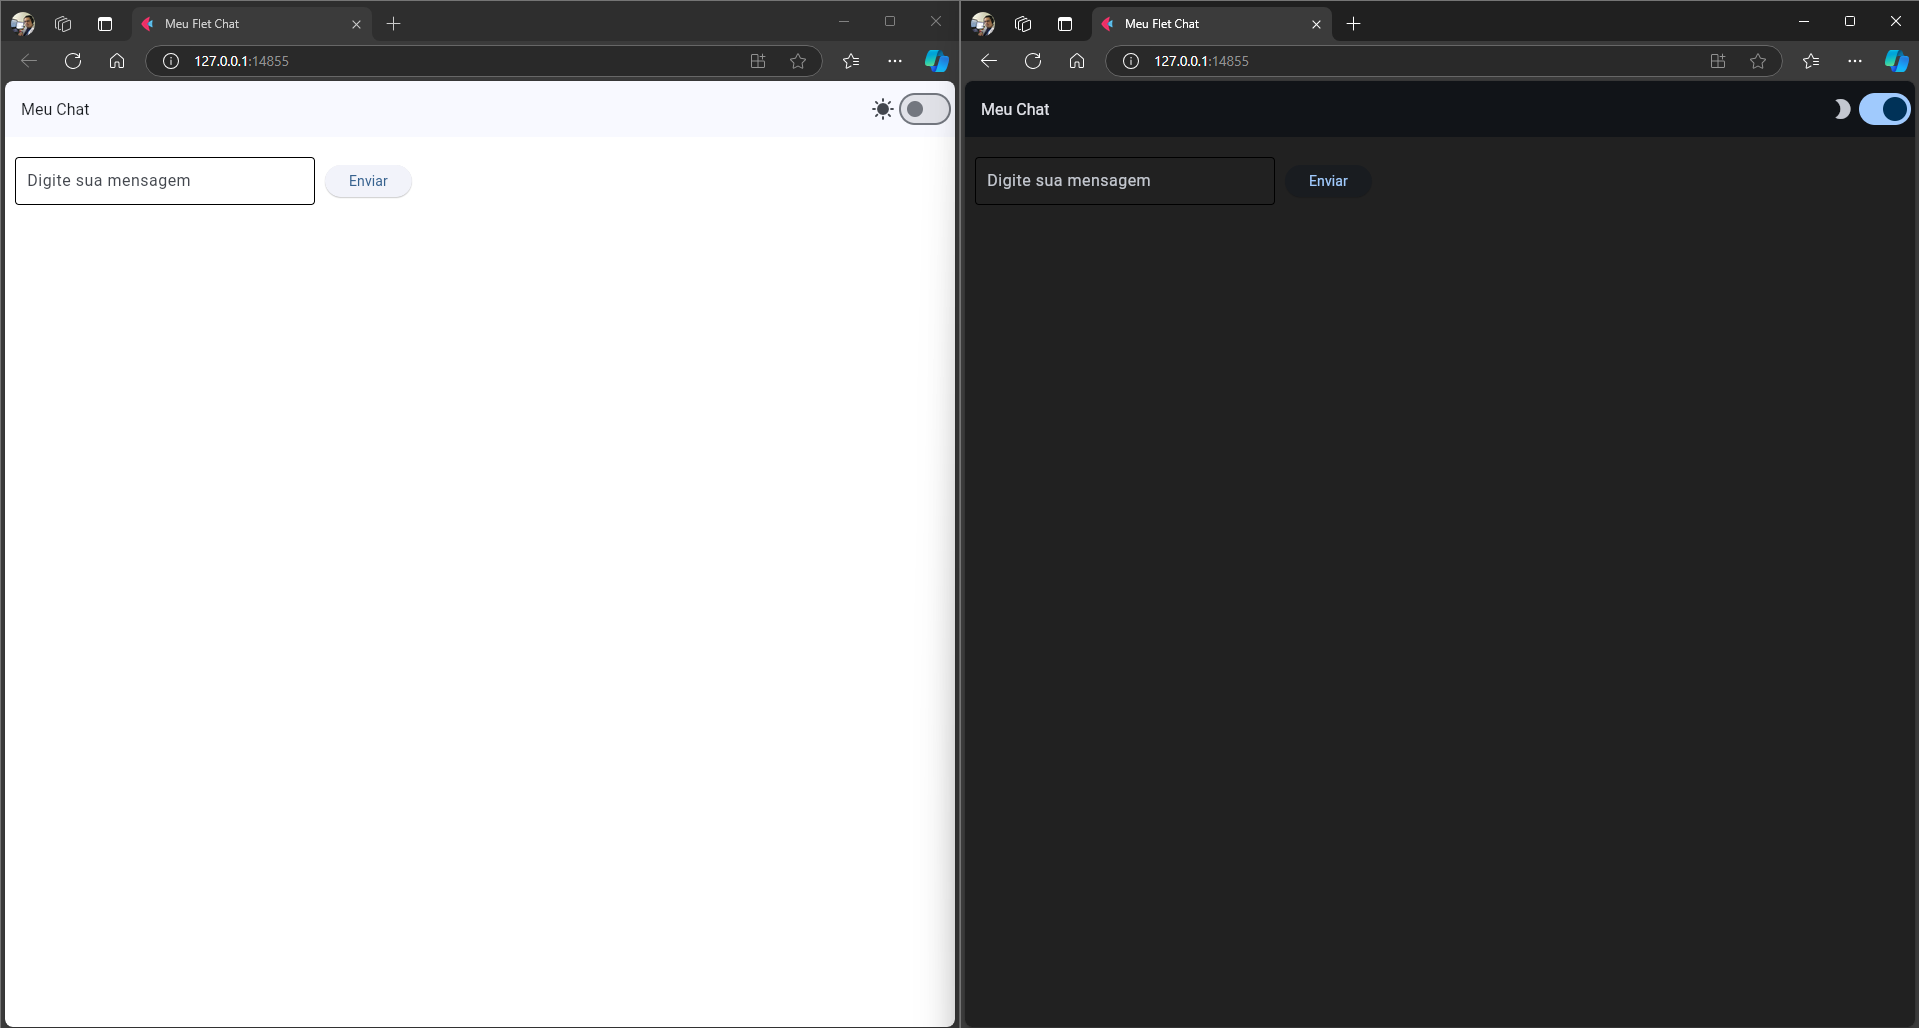

24. Para construir um aplicativo de bate-papo em tempo real, você precisa passar de alguma forma as mensagens entre as sessões do aplicativo de bate-papo. Quando um usuário envia uma mensagem, ela deve ser transmitida para todas as outras sessões do aplicativo e exibida em suas páginas. Flet fornece um mecanismo PubSub integrado simples para comunicação assíncrona entre sessões de página.
25. Antes de mais nada, precisaremos criar uma classe chamada `Mensagem`. Vamos fazer isso importando o já conhecido nosso `dataclass` no início do nosso código:

In [ ]:
# importa biblioteca dataclasses
from dataclasses import dataclass

@dataclass
class Mensagem:
    usuario: str
    texto: str

26. Agora, precisamos inscrever o usuário para receber mensagens de transmissão. Adicione a linha de comando abaixo ao seu código, dentro da função `main`:

In [ ]:
page.pubsub.subscribe(on_message)

27. O método `pubsub.subscribe()` adicionará a sessão atual do aplicativo à lista de assinantes. Ele aceita o manipulador como argumento, que será chamado posteriormente no momento em que um editor chamar o método `pubsub.send_all()`.
28. No manipulador adicionaremos uma nova mensagem (Texto) à lista de controles de chat:

In [ ]:
def on_message(mensagem: Mensagem):
        chat.controls.append(ft.Text(f"{mensagem.usuario}: {mensagem.texto}"))
        page.update()

29. Finalmente, você precisa chamar o método `pubsub.send_all()` quando o usuário clicar no botão "Enviar":

In [ ]:
def enviar(e):
        page.pubsub.send_all(Mensagem(usuario=page.session_id, texto=nova_mensagem.value))
        nova_mensagem.value = ""
        page.update()

30. O comando `pubsub.send_all()` chamará `on_message()` e passará o objeto `Mensagem` para ele.
31. O código-fonte até aqui deverá ser parecido com este aqui:

In [ ]:
import flet as ft
from dataclasses import dataclass # importa biblioteca dataclasses

# classe Mensagem
@dataclass
class Mensagem:
    usuario: str
    texto: str

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    def enviar(e):
        page.pubsub.send_all(Mensagem(usuario=page.session_id, texto=nova_mensagem.value))
        nova_mensagem.value = ""
        page.update()

    # identifica o usuário e adiciona a mensagem ao chat
    def on_message(mensagem: Mensagem):
        chat.controls.append(ft.Text(f"{mensagem.usuario}: {mensagem.texto}"))
        page.update()

    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)
    chat = ft.Column()
    nova_mensagem = ft.TextField(label="Digite sua mensagem", on_submit=enviar)
    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16), actions=[tema, interruptor])

    # inscreve o usuário para receber a transmissão
    page.pubsub.subscribe(on_message)

    page.add(
        chat, ft.Row(controls=[nova_mensagem, ft.ElevatedButton("Enviar", on_click=enviar)])
    )

ft.app(main)

32. O resultado até este momento deverá se parecer com o da imagem abaixo:

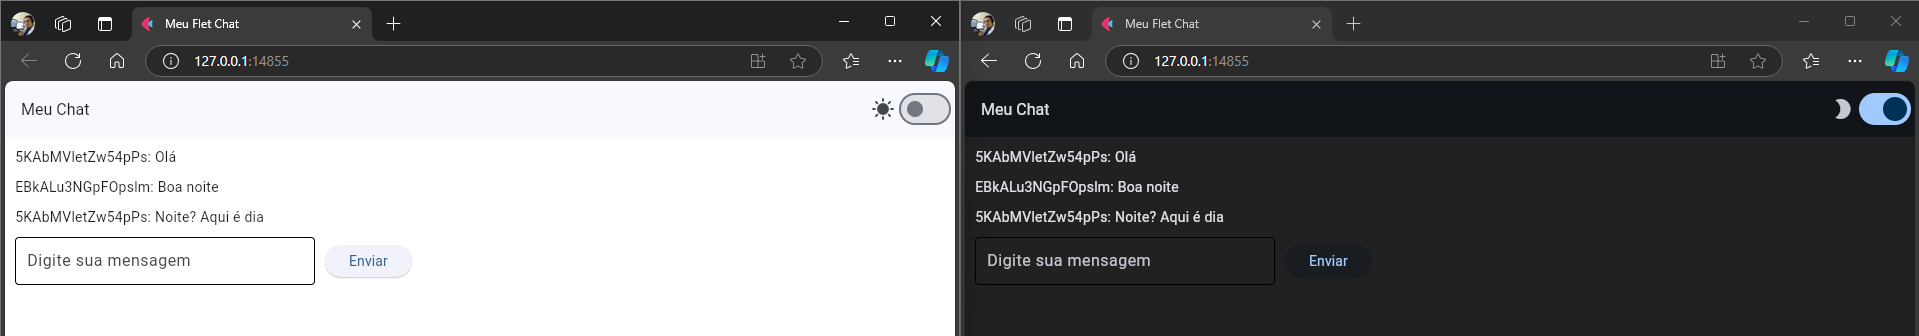

33. O aplicativo de bate-papo que você criou na etapa anterior possui funcionalidades básicas necessárias para trocar mensagens entre sessões de usuário. Porém, não é muito fácil de usar, pois mostra o `session_id` que enviou uma mensagem, o que não diz muito sobre com quem você está se comunicando.
Vamos melhorar nosso aplicativo para mostrar o nome do usuário em vez do `session_id` para cada mensagem.

### Caixa de diálogo de nome de usuário

34. Para capturar o nome do usuário, usaremos o controle `AlertDialog`. Primeiro, criamos uma variável para o usuário inserir seu nome:

In [ ]:
nome_usuario = ft.TextField(label="Informe seu nome")


35. Depois, Vamos adicionar o controle `AlertDialog` à página:

In [ ]:
page.dialog = ft.AlertDialog(
    open=True,
    modal=True,
    title=ft.Text("Bem Vindo!"),
    content=ft.Column([nome_usuario], tight=True),
    actions=[ft.ElevatedButton(text="Entrar no chat", on_click=join_click)],
    actions_alignment="end",
)

36. O código-fonte até aqui ficará assim:

In [ ]:
import flet as ft
from dataclasses import dataclass

@dataclass
class Mensagem:
    usuario: str
    texto: str

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    def enviar(e):
        page.pubsub.send_all(Mensagem(usuario=page.session_id, texto=nova_mensagem.value))
        nova_mensagem.value = ""
        page.update()

    def on_message(mensagem: Mensagem):
        chat.controls.append(ft.Text(f"{mensagem.usuario}: {mensagem.texto}"))
        page.update()

    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)
    chat = ft.Column()
    nova_mensagem = ft.TextField(label="Digite sua mensagem", on_submit=enviar)
    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16), actions=[tema, interruptor])
    nome_usuario = ft.TextField(label="Informe seu nome") # caixa de texto onde o usuário irá informar seu nome

    page.pubsub.subscribe(on_message)

    # controle de caixa de diálogo
    page.dialog = ft.AlertDialog(
        open=True,
        modal=True,
        title=ft.Text("Bem Vindo!"),
        content=ft.Column([nome_usuario], tight=True),
        actions=[ft.ElevatedButton(text="Entrar no chat")],
        actions_alignment="end",
    )

    page.add(
        chat, ft.Row(controls=[nova_mensagem, ft.ElevatedButton("Enviar", on_click=enviar)])
    )

ft.app(main)

37. Uma caixa de diálogo será aberta no início do programa, pois definimos sua propriedade `open` como `True`:

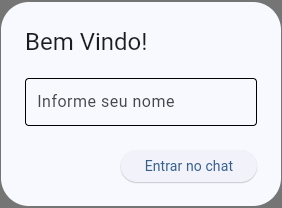

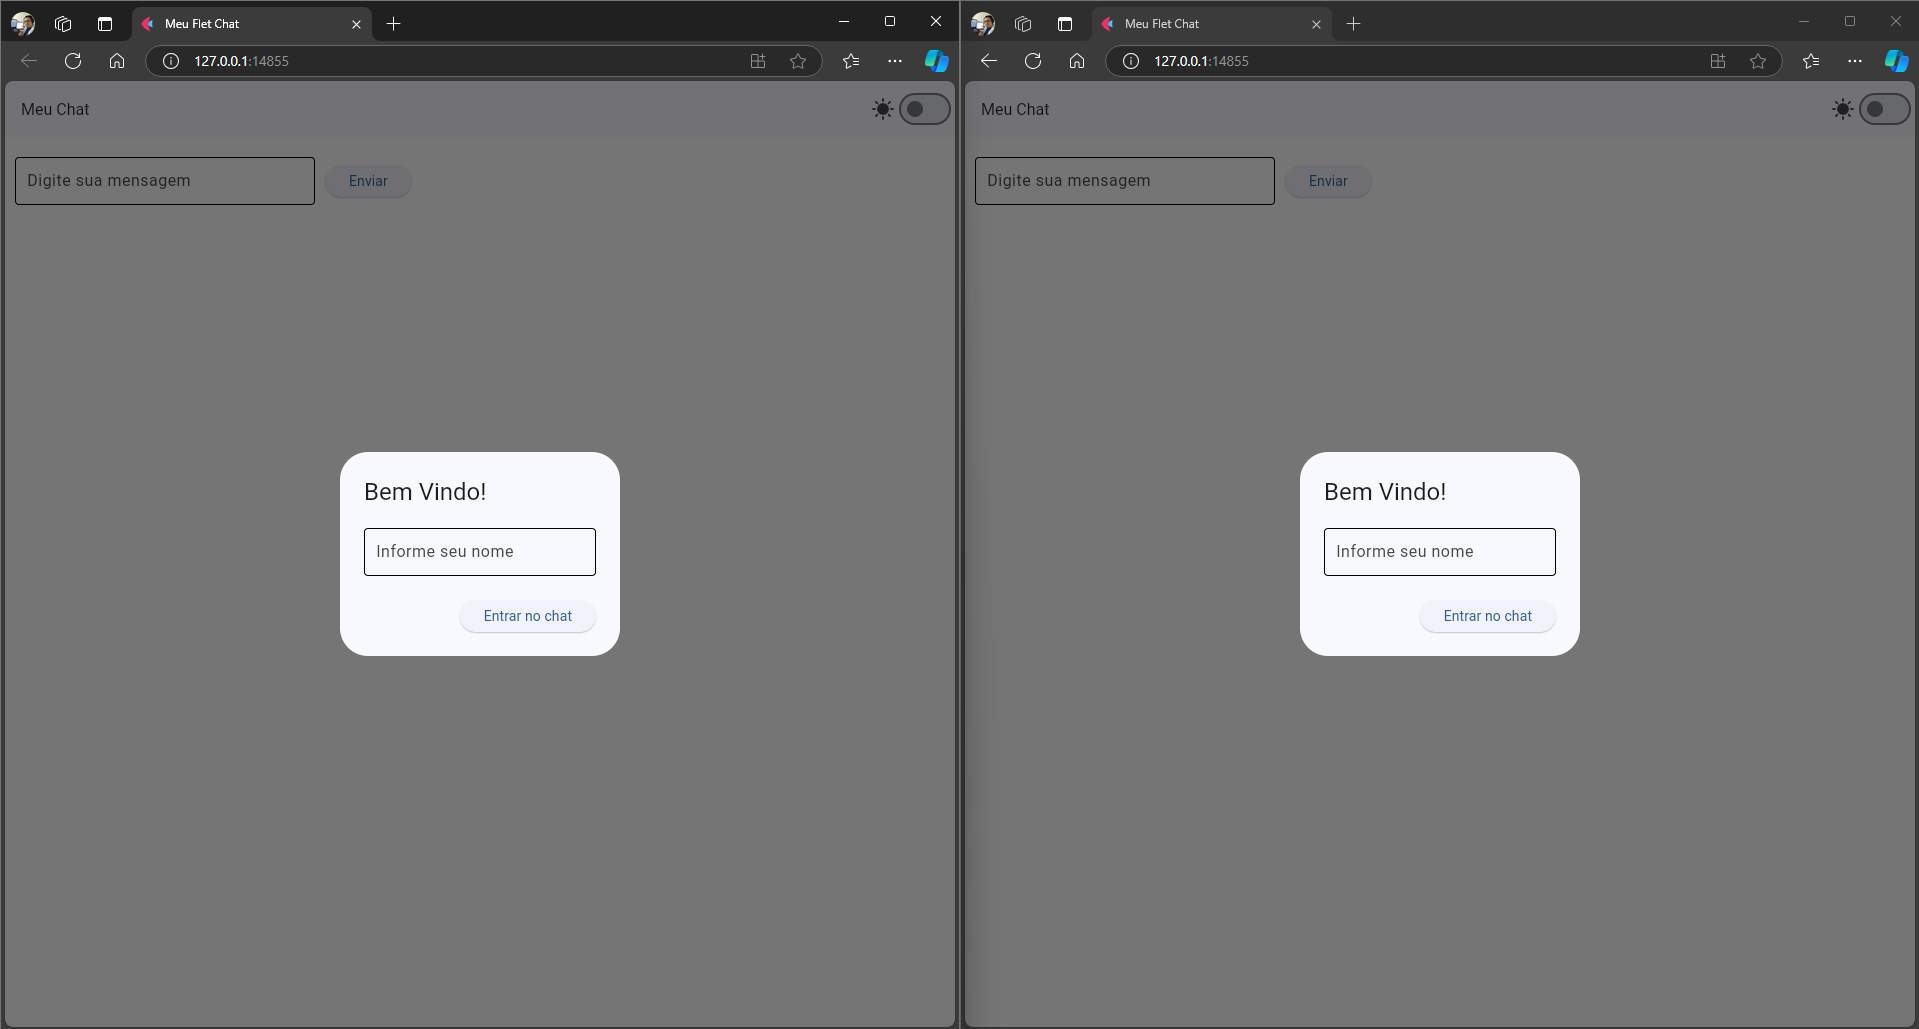

38. Quando o usuário clicar no botão “Entrar no chat”, será chamado o método `entrar` (que ainda não foi programado) que deverá enviar uma mensagem a todos os assinantes, informando que o usuário entrou no chat. Esta mensagem deve ser diferente da mensagem normal do chat, por exemplo, assim:

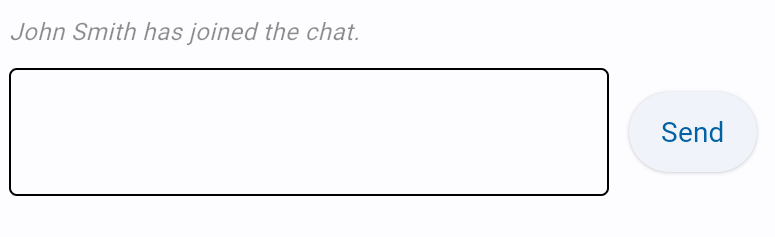

39. Vamos adicionar a propriedade `tipo_mensagem` à classe `Mensagem` para diferenciar entre mensagens de login e de chat:

In [ ]:
@dataclass
class Mensagem:
    usuario: str
    texto: str
    tipo_mensagem: str

40. Estaremos verificando `tipo_mensagem` no método `on_message`:

In [ ]:
def on_message(mensagem: Mensagem):
    if mensagem.tipo_mensagem == "chat_message":
        chat.controls.append(ft.Text(f"{mensagem.usuario}: {mensagem.texto}"))
    elif mensagem.tipo_mensagem == "login_message":
        chat.controls.append(
            ft.Text(mensagem.texto, italic=True, color=ft.colors.BLACK45, size=12)
        )
    page.update()

41. Mensagens dos tipos "login_message" e "chat_message" agora serão enviadas em dois eventos: quando o usuário entrar no chat e quando o usuário enviar uma mensagem.
42. Vamos criar o método `entrar`:

In [ ]:
def entrar(e):
    if not nome_usuario.value:
        nome_usuario.error_text = "Nome não pode ficar em branco!"
        nome_usuario.update()
    else:
        page.session.set("nome_usuario", nome_usuario.value)
        page.dialog.open = False
        page.pubsub.send_all(Mensagem(usuario=nome_usuario.value, texto=f"{nome_usuario.value} entrou no chat.", tipo_mensagem="login_message"))
        page.update()

43. Usamos o armazenamento de sessão de página para armazenar `nome_usuario` para uso futuro no método `enviar` para enviar mensagens de bate-papo.
44. A caixa de diálogo do nome de usuário será fechada assim que definirmos sua propriedade open como `False` e chamarmos o método `update()`.
45. Finalmente, vamos atualizar o método `enviar` para usar `nome_usuario` que salvamos anteriormente usando `page.session`:

In [ ]:
def enviar(e):
        page.pubsub.send_all(Mensagem(usuario=page.session.get('nome_usuario'), texto=nova_mensagem.value, tipo_mensagem="chat_message"))
        nova_mensagem.value = ""
        page.update()

46. Abaixo segue o código-fonte feito até o momento:

In [ ]:
import flet as ft
from dataclasses import dataclass

@dataclass
class Mensagem:
    usuario: str
    texto: str
    tipo_mensagem: str

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    def enviar(e):
        page.pubsub.send_all(Mensagem(usuario=page.session.get('nome_usuario'), texto=nova_mensagem.value, tipo_mensagem="chat_message"))
        nova_mensagem.value = ""
        page.update()

    def on_message(mensagem: Mensagem):
        if mensagem.tipo_mensagem == "chat_message":
            chat.controls.append(ft.Text(f"{mensagem.usuario}: {mensagem.texto}"))
        elif mensagem.tipo_mensagem == "login_message":
            chat.controls.append(
                ft.Text(mensagem.texto, italic=True, color=ft.colors.BLACK45 if page.theme_mode == ft.ThemeMode.LIGHT else ft.colors.WHITE, size=12)
            )
        page.update()

    def entrar(e):
        if not nome_usuario.value:
            nome_usuario.error_text = "Nome não pode ficar em branco!"
            nome_usuario.update()
        else:
            page.session.set("nome_usuario", nome_usuario.value)
            page.dialog.open = False
            page.pubsub.send_all(Mensagem(usuario=nome_usuario.value, texto=f"{nome_usuario.value} entrou no chat.", tipo_mensagem="login_message"))
            page.update()

    page.title = "Meu Flet Chat"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)
    chat = ft.Column()
    nova_mensagem = ft.TextField(label="Digite sua mensagem", on_submit=enviar)
    page.appbar = ft.AppBar(title=ft.Text("Meu Chat", size=16), actions=[tema, interruptor])
    nome_usuario = ft.TextField(label="Informe seu nome", on_submit=entrar)

    page.pubsub.subscribe(on_message)

    page.dialog = ft.AlertDialog(
        open=True,
        modal=True,
        title=ft.Text("Bem Vindo!"),
        content=ft.Column([nome_usuario], tight=True),
        actions=[ft.ElevatedButton(text="Entrar no chat", on_click=entrar)],
        actions_alignment="end",
    )

    page.add(
        chat, ft.Row(controls=[nova_mensagem, ft.ElevatedButton("Enviar", on_click=enviar)])
    )

ft.app(main)

47. O resultado até aqui segue abaixo:

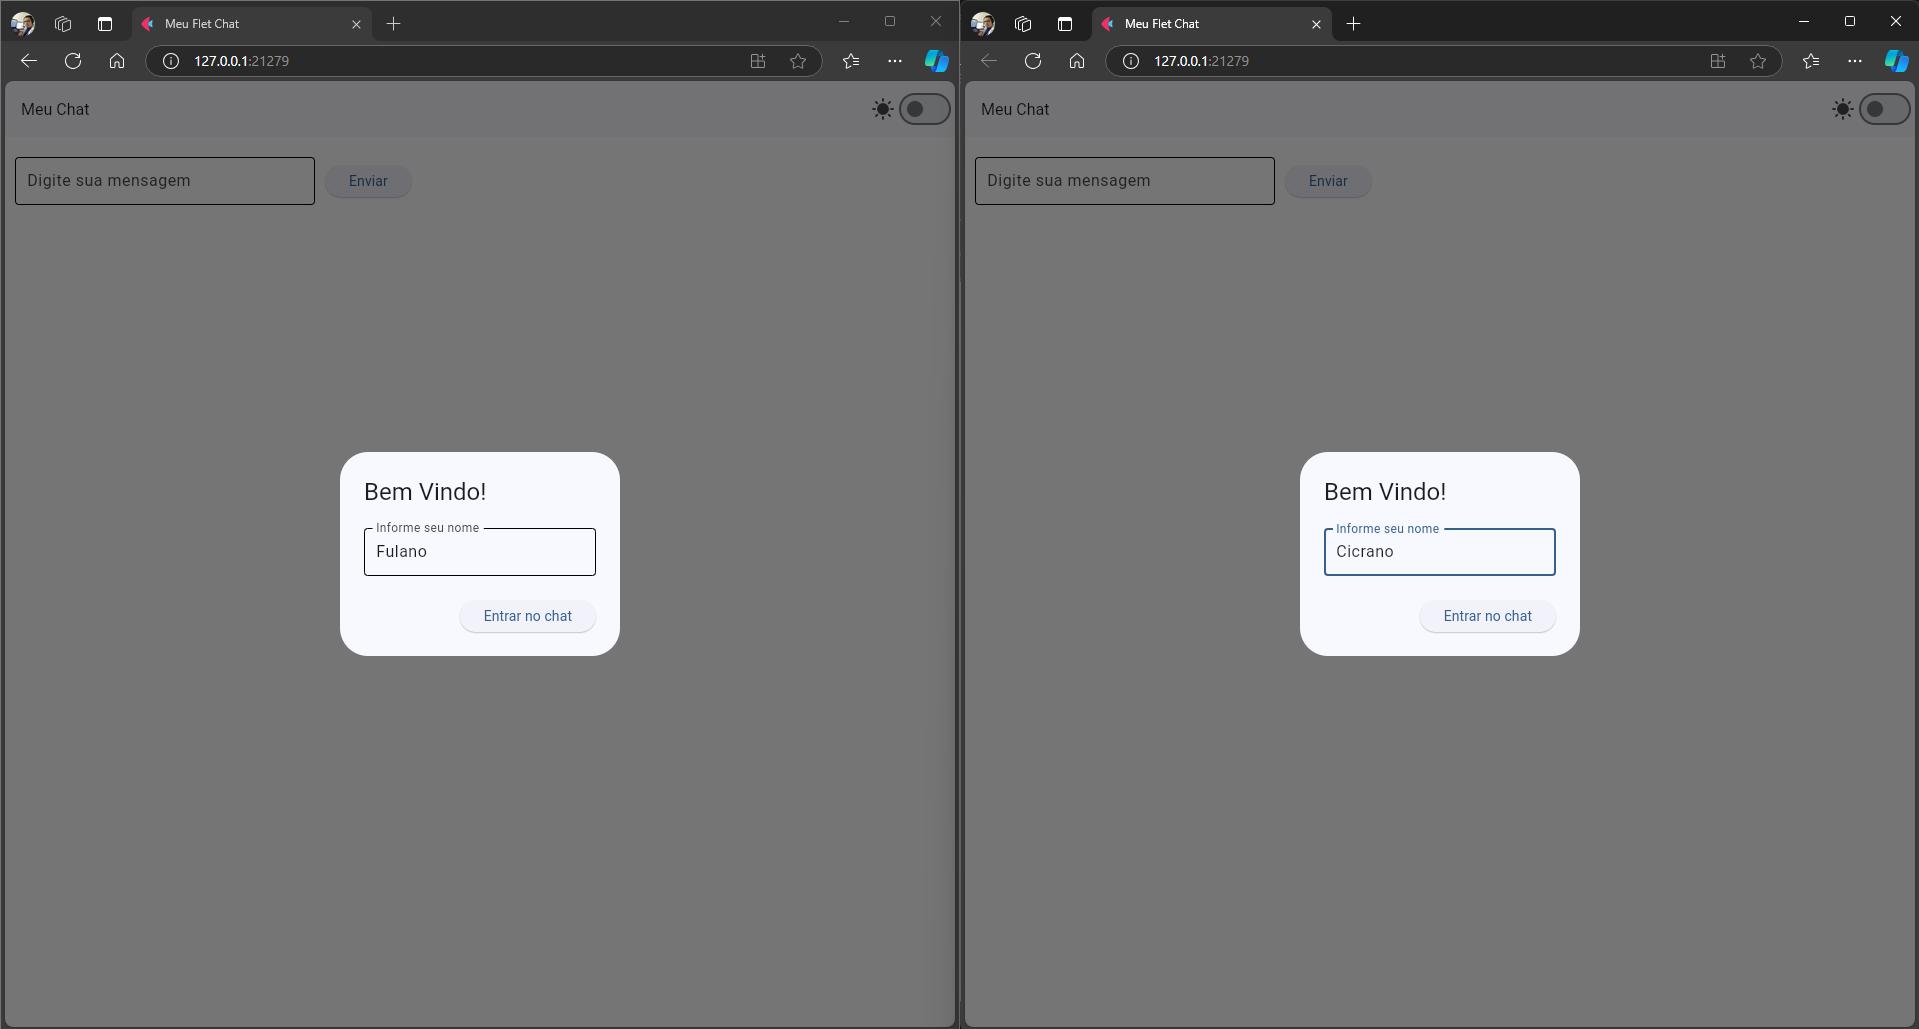
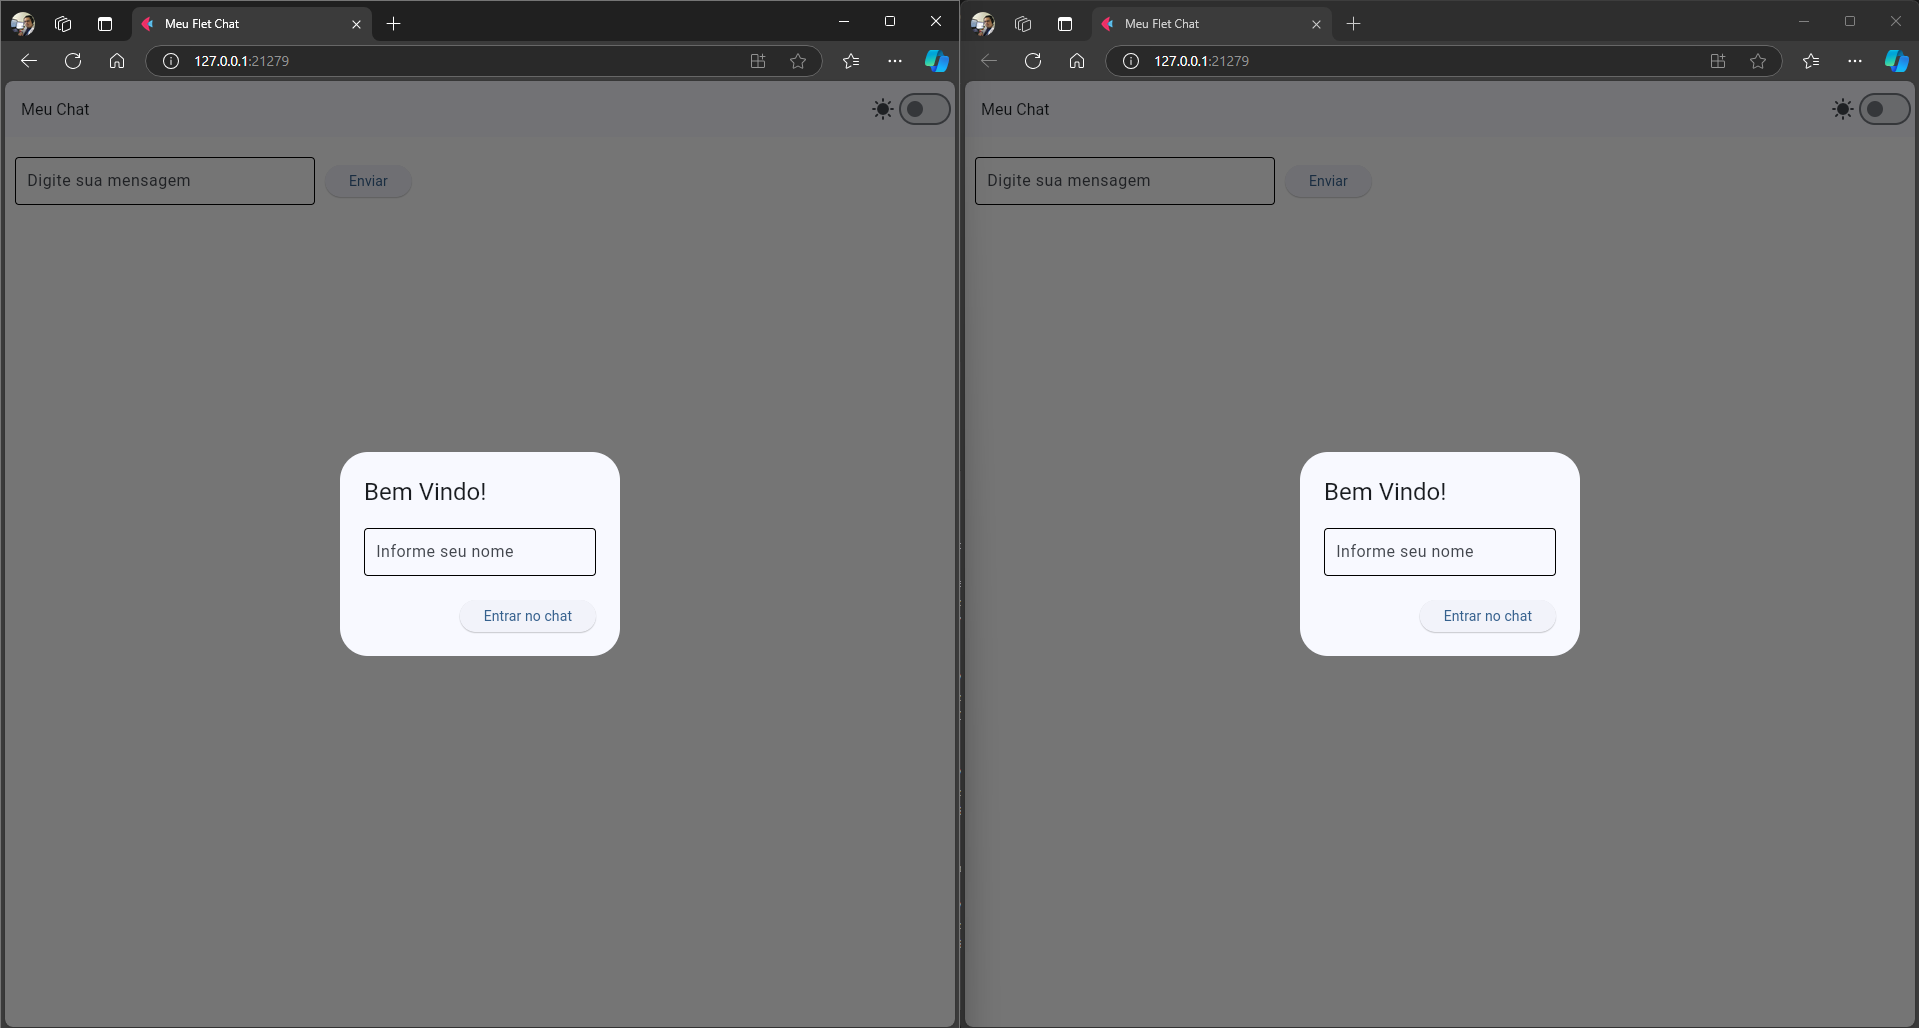

#### Continua...